## Regressão de Ridge

A Ridge Regression é um método de regularização do modelo que tem como principal objetivo suavizar
atributos que sejam relacionados uns aos outros e que aumentam o ruído no modelo.
Na regressão de Ridge, também queremos que todas as variáveis demonstrem o menor efeito possível
sobre o resultado, o que resulta em uma inclinação inferior aos modelos de MQO.
Essa restrição de inclinação é conhecida como regularização.

No aprendizado de máquinas, o método de Ridge é implementado por meio da função linear_model.Ridge.
Usaremos os dados de Boston para demonstrar como proceder com esse método.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))


training set score: 0.885797
test set score: 0.752768


/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Como se pode observar, o R² da base de treinamento é superior ao R² da base de teste, o que
corrige o problema de sobreajuste encontrado na regressão linear.

Em comparação ao modelo linear, a regressão de Ridge troca a simplicidade do modelo pelo melhor
ajuste da base de treinamento. A importância que o modelo de Ridge atribui entre a simplicidade
e o ajuste é dado pelo parâmetro alpha. No código acima, o valor defull para alpha é $\alpha = 1$.
O aumento do alfa força os coeficientes a se moverem mais para zero, o que diminui o desempenho do
conjunto de treinamento, mas pode ajudar na generalização.

A seguir, vamos testar o mesmo modelo usado acima, porém com um valor de $\alpha = 10$.

In [3]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))




training set score: 0.788279
test set score: 0.635941


Observa-se que o teste de escore para a base de treinamento é menor do que no caso em que usamos
$\alpha = 1$. Vamos agora testar o modelo usando um valor de $\alpha = 0,1$.

In [6]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: %f" % ridge01.score(X_train, y_train))
print("test set score: %f" % ridge01.score(X_test, y_test))


training set score: 0.928227
test set score: 0.772207


Nesse caso, o valor do R² foi superior aos dois casos anteriores. Vale destacar que
um alfa mais alto significa um modelo mais restrito, portanto esperamos que as entradas
dos coeficientes tenham uma magnitude menor para um valor alto de alfa do que para um valor
baixo de alfa.


O gráfico abaixo sumariza esse detalhe:

Primeiro vamos construir o modelo linear para a comparação

In [8]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

Agora plotamos o gráfico para os modelos de Ridge com diferentes valores de $\alpha$ e
com os valores preditos da regressão linear:

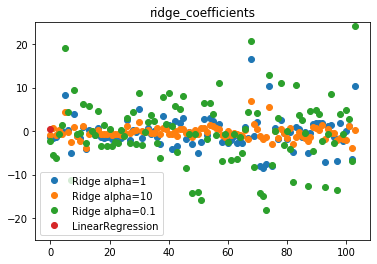

In [9]:
plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25, 25)
plt.legend()

## LASSO

Na ***Regressão de Ridge*** coloca um viés e que vai reduzindo os valores os betas até
o valor zero. Com isso as variáveis que contribuem menos para o poder preditivo do modelo
são levados para a irrelevância usando esse mecanismo de penalização do viés.

Já o ***Lasso***, tem o mesmo mecanismo de penalização dos coeficientes com um alto grau
de correlação entre si, mas que usa o mecanismo de penalizar os coeficientes de acordo com
o seu valor absoluto (soma dos valores dos estimadores) usando o mecanismo de minimizar
o erro quadrático. Isso é feito através da penalização do coeficiente até que o mesmo
convirja para zero; o que naturalmente vai eliminar a variável e reduzir a dimensionalidade do modelo.

Vamos usar os dados de *Boston* para fazer uma aplicação do lasso.

Para tanto, usamos a função *Lasso*.

In [4]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("Score do conjunto de treinamento: %f" % lasso.score(X_train, y_train))
print("Score do conjunto de teste: %f" % lasso.score(X_test, y_test))
print("Número de variáveis utilizadas: %d" % np.sum(lasso.coef_ != 0))


Score do conjunto de treinamento: 0.293238
Score do conjunto de teste: 0.209375
Número de variáveis utilizadas: 4


Podemos notar duas características nessa estimação:

* Primeiro: A base de dados de Boston possui 104 variáveis e o Lasso usou apenas 4 delas.

* Segundo: O R² é muito baixo, tanto no conjunto de teste quanto no conjunto de treinamento.

Assim como na *Regressão de Ridge*, o Lasso também possui um parâmetro de penaliação
que indica com que magnitude os coeficientes devem convergir para zero.

O valor padrão desse parâmetro é $\alpha = 1$. 
* Quanto mais próximo de 1, maior será a penaliação.
* Quanto mais próximo de zero, menor será a penalização.

A seguir, utilizaremos um $\alpha$ de menor valor para reduzir a penalização e
checar o desempenho do modelo.

* **Usaremos $\alpha = 0,01 $**

In [5]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Teste de score para o conjunto de treinamento: %f" % lasso001.score(X_train, y_train))
print("Teste de score para o conjunto de teste: %f" % lasso001.score(X_test, y_test))
print("Número de variáveis utilizadas: %d" % np.sum(lasso001.coef_ != 0))


Teste de score para o conjunto de treinamento: 0.896112
Teste de score para o conjunto de teste: 0.767800
Número de variáveis utilizadas: 32


/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318007, tolerance: 3.233182126649076
  positive)


A performace do modelo melhorou bastante ao passo que o modelo utilizou 32 das 105 variáveis.

Podemos demonstrar as duas opções e a regressão de Ridge cm $\alpha = 0,1$ em um gráfico:

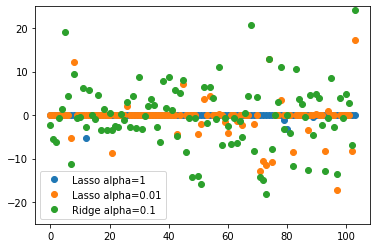

In [10]:
plt.plot(lasso.coef_, 'o', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'o', label="Lasso alpha=0.01")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)
plt.legend()


### Modelo linear para classificação

Suponhamos que tenhamos uma variável *y* que é dividida em classes. Ex: Homem ou mulher.
Os modelos lineares também são aplicados para prever o tipo de classificação de acordo com
as características das observações.

Os principais algorítimos utilizados para efetura modelos de regressão para com a aprendizagem
de máquinas são a regressão logística, na qual se utiliza a função ***linear_model.LogisticRegression***
e as máquinas de vetores de suporte linear, implementado por meio da função ***svm.LinearSVC***.

Para demonstrar a utilização da regressão logística, vamos fazer uso da base *make_forge*

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logit = LogisticRegression().fit(X_train, y_train)

print(f'Coeficientes do modelo: {logit.coef_}')
print(f'R² da base de treinamento: {logit.score(X_train, y_train)}')
print(f'R² do conjunto de teste: {logit.score(X_test, y_test)}')


Coeficientes do modelo: [[-0.42296145  1.24488436]]
R² da base de treinamento: 0.9473684210526315
R² do conjunto de teste: 0.8571428571428571


/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Usando o as máquinas de vetores de suporte linear:

In [19]:
svc = LinearSVC().fit(X_train, y_train)
print(f'Coeficientes do modelo: {svc.coef_}')
print(f'R² da base de treinamento: {svc.score(X_train, y_train)}')
print(f'R² do conjunto de teste: {svc.score(X_test, y_test)}')

Coeficientes do modelo: [[-0.11488811  0.54758158]]
R² da base de treinamento: 0.9473684210526315
R² do conjunto de teste: 0.8571428571428571


/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Podemos analisar a diferença entre os dois modelos por meio da representação gráfica.

/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


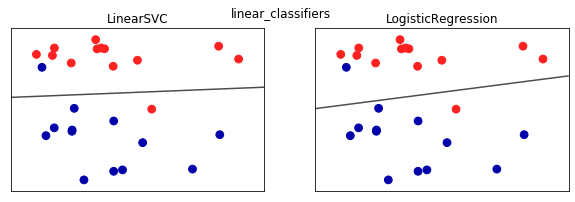

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plt.suptitle("linear_classifiers")
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%s" % clf.__class__.__name__)


Tanto na função LogisticRegression quanto na função LinearSVC o parâmetro que determina a intensidade
da reguçarização é o parâmetro C. Quanto maior o valor de C, maior será o ajuste que o modelo fará
na base de treinamento. Valores menores desse parâmetro fazem com que o modelo dê mais ênfase
a um vetor próximo da nulidade.

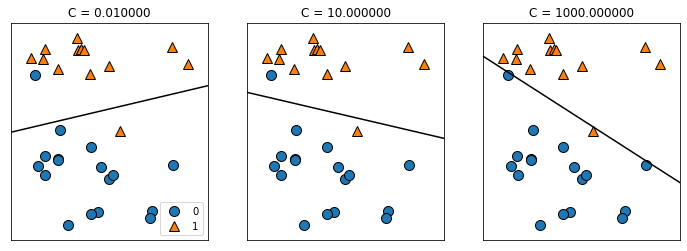

In [4]:
mglearn.plots.plot_linear_svc_regularization()

Observe que quanto mais próximo de zero é o valor de C, mais próximo de zero é a reta de regressão.
**Obs: O valor padrão de C é C = 1**.

Vamos testar três casos (C = 1, C = 0,01 e C = 100) e ver qual modelo tem o melhor ajuste.

Para C = 100, fazemos

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

R² do conjunto de treinamento: 0.967136
R² do conjunto de teste: 0.965035


/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
logisticregression100 = LogisticRegression(C=100).fit(X_train, y_train)
print("R² do conjunto de treinamento: %f" % logisticregression100.score(X_train, y_train))
print("R² do conjunto de teste: %f" % logisticregression100.score(X_test, y_test))

R² do conjunto de treinamento: 0.967136
R² do conjunto de teste: 0.965035


/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Para C = 0,01 fazemos

In [17]:
logisticregression_01 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("R² do conjunto de treinamento: %f" % logisticregression_01.score(X_train, y_train))
print("R² do conjunto de teste: %f" % logisticregression_01.score(X_test, y_test))


R² do conjunto de treinamento: 0.934272
R² do conjunto de teste: 0.930070


/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Para C = 1, temos

In [18]:
logisticregression = LogisticRegression().fit(X_train, y_train)
print("R² do conjunto de treinamento: %f" % logisticregression.score(X_train, y_train))
print("R² do conjunto de teste: %f" % logisticregression.score(X_test, y_test))


R² do conjunto de treinamento: 0.953052
R² do conjunto de teste: 0.958042


/home/helson/Documentos/SEMINARIO/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Árvore de decisão

O processo de aprendizagem é dado basicamente por questões do tipo *ifelse*. 
Imagine que você esteja predizendo o tipo de animal dentre quatro espécies. Ao analisar uma
determinada característica, você verifica se ela pertence ao animal *i* ou não. Tendo essa resposta
em mãos, você pode passar para a análise da próxima característica, e assim sussesivamente,
até ter a predição referente à espécie do animal em questão.

Para construir a árvore de decisão, usamos a função tree.DecisionTreeClassifier

Para exemplificar, vamos usar a base sobre rozas ***iris dataset***.

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
iris = load_iris()
X = iris['data']
y = iris['target']
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



Para demonstrar o uso da árvore de decisão com maior detalhe, vamos utilizar uma base de dados
sobre casos de diabetes na Índia.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
from sklearn.model_selection import train_test_split
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
dados = pd.read_csv('diabetes.csv', header=None, skiprows = 1, names=col_names)
dados.head(5)

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

O próximo passo é dividir as colunas entre variáves independentes (*features*) e dependentes (*targets*).

In [6]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = dados[feature_cols] # Features
y = dados.label # Target variable

Agora vamos dividir a base entre teste e treinamento. Vamos usar o comando *size = 0.3*
para indicar que vamos usar 30% da base como conjunto de teste.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


Criando a arvore de decisão

In [8]:
clf = DecisionTreeClassifier().fit(X_train,y_train)

Fazendo uma predição para o conjunto de teste

In [9]:
y_pred = clf.predict(X_test)
print(y_pred)


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


##### Avaliando o modelo
Vamos usar o pacote *metrics* para obter a acurácia

In [10]:
from sklearn import metrics
print("Accurácia do modelo:",metrics.accuracy_score(y_test, y_pred))



Accurácia do modelo: 0.7012987012987013


#### Visualizando a árvore de decisão

Para isso, vamos usar os pacotes *graphviz* e *pydotplus*

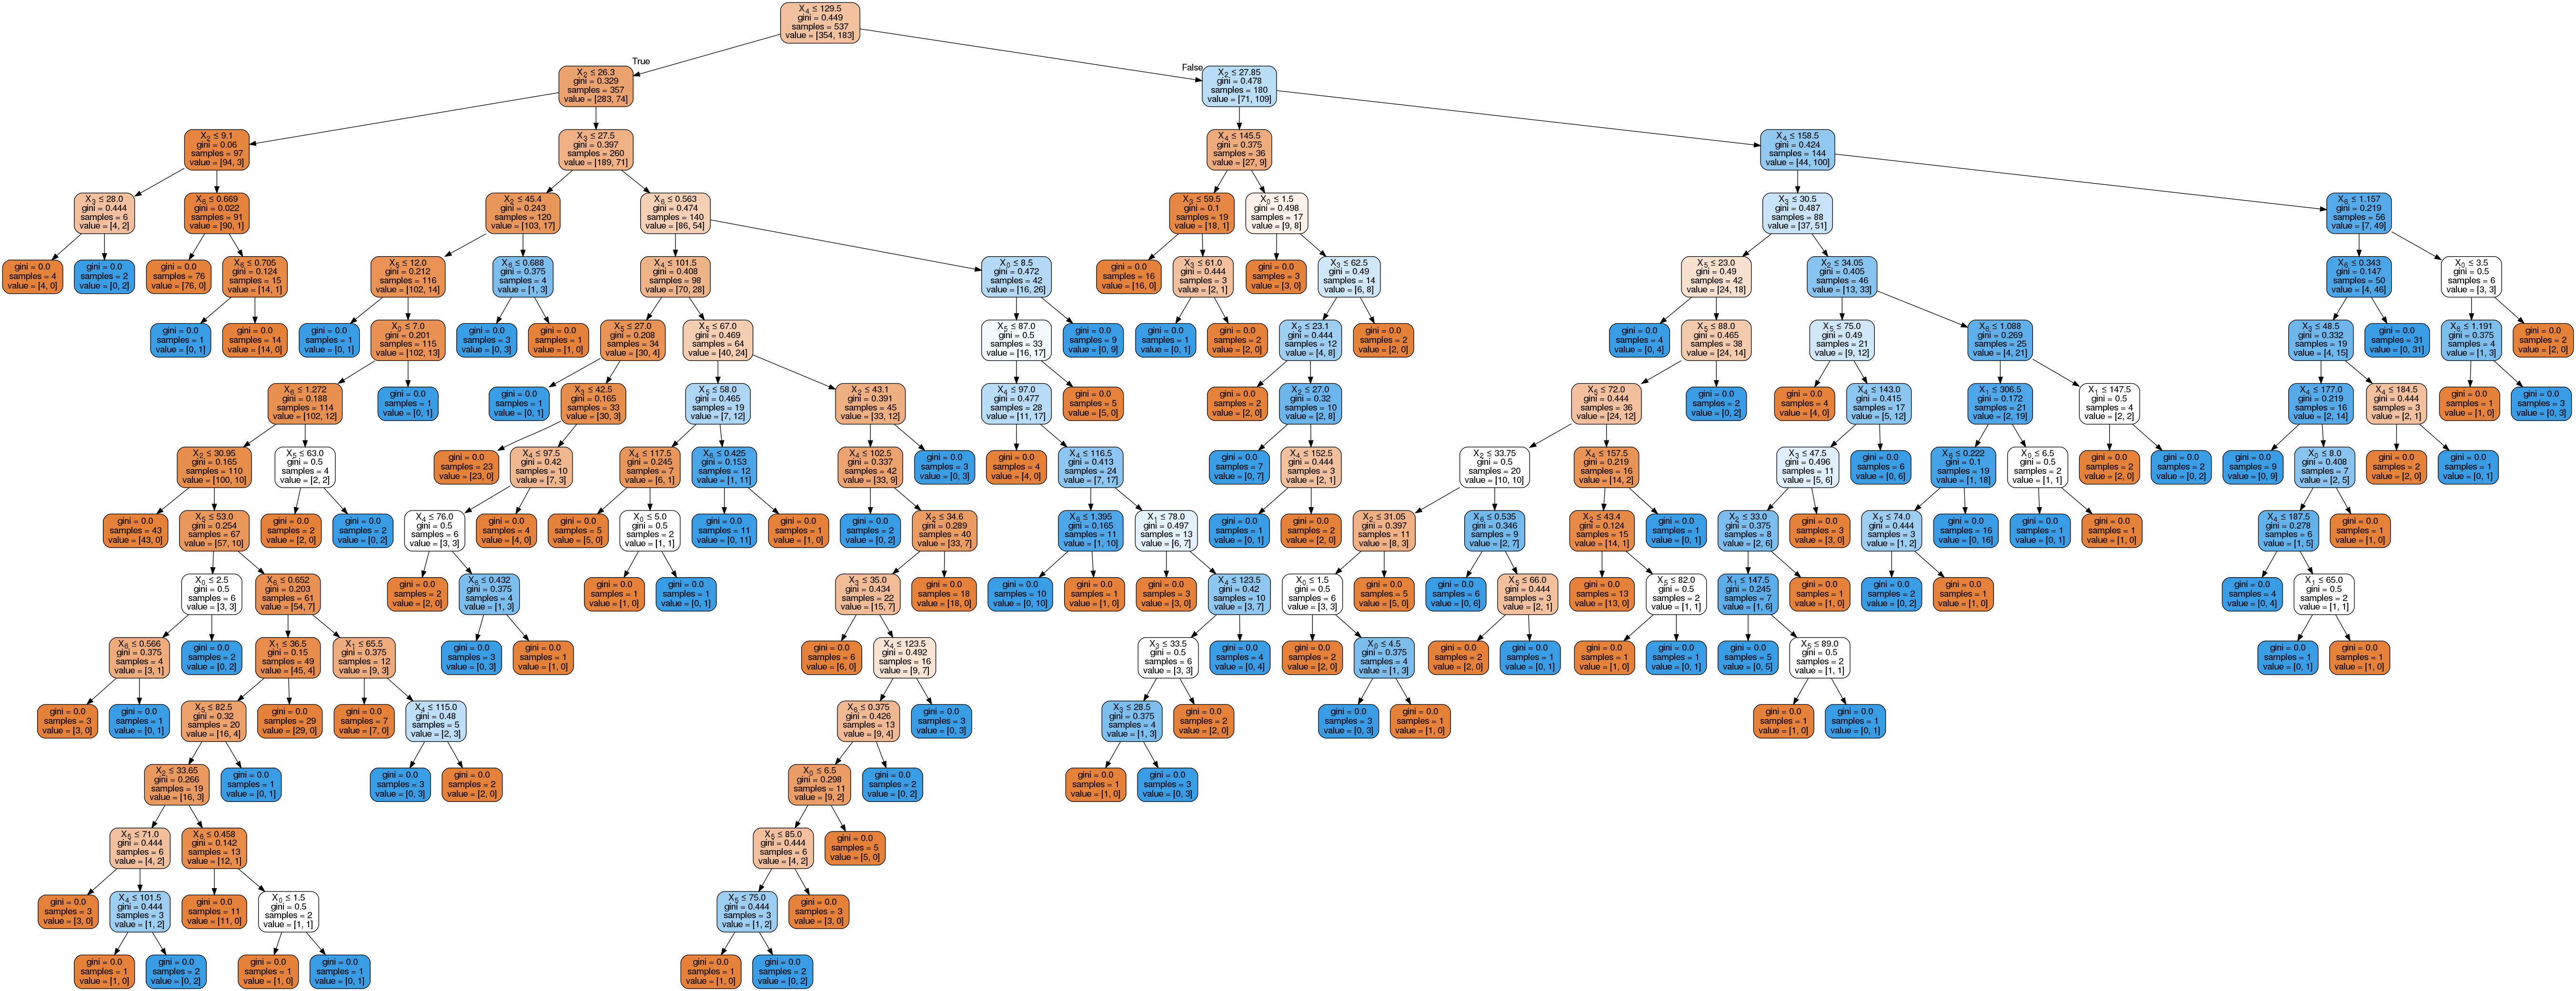

In [11]:
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# Obs: EM caso de não visualização, proceder com
# sudo apt-get install python-pydot

Para otimizar a visualização da árvore de decisão, podemos escolher o número de ramos
usando o comando *max_depth*.

In [12]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Árvore de decisão
clf = clf.fit(X_train,y_train)

#Predição da resposta na base de teste
y_pred = clf.predict(X_test)

# Acurácia
print("Accurácia do modelo:",metrics.accuracy_score(y_test, y_pred))

Accurácia do modelo: 0.7705627705627706


Vizualização com 3 ramos

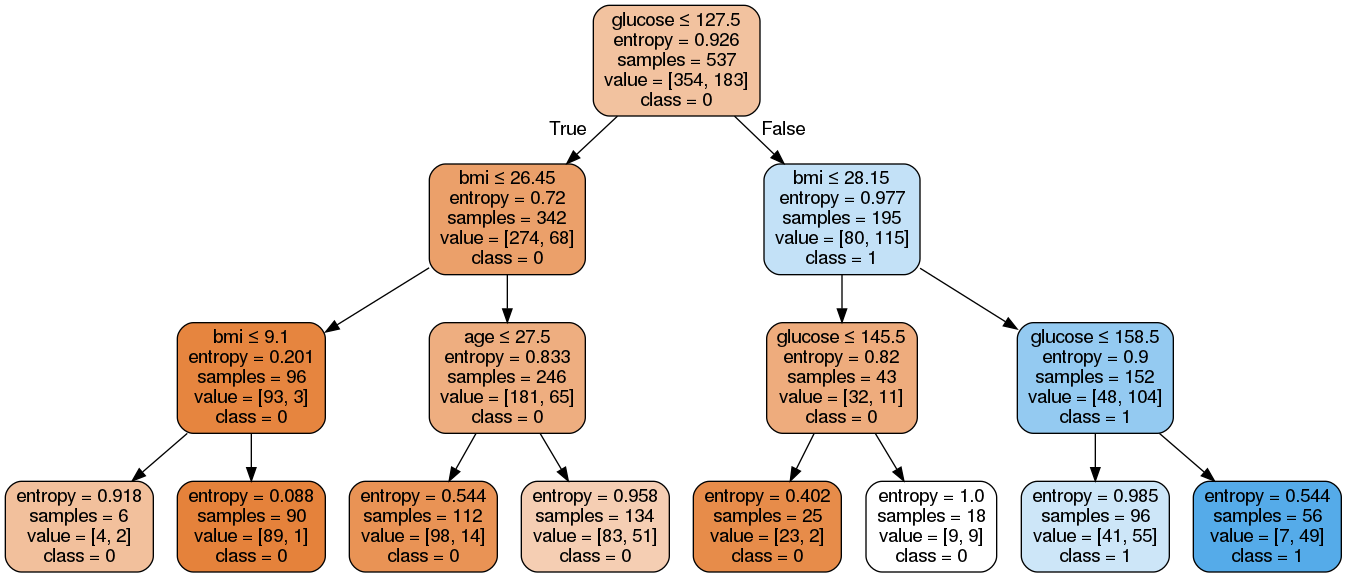

In [13]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


##### Uma alternativa para a visualização da árvore de decisão

Em vez de olhar para a árvore como um todo, podemos utilizar o recurso *feature importance*
para demosntrar o funcionamento da árvore. Em suma, esse processo mostra um valor entre
zero e um, onde 1 indica a predição pefeita e zero indica que esse recurso pode não ter
contribuído adequadamente na predição.

In [ ]:
plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0, 1)














